# Birth and death process

FADLI NAZIM

### Model Presentation

The **birth-death process** is a Markov jump process used to model systems with random transitions between states over time. It is widely applied in fields like population dynamics and epidemiology. The model simulates and predicts the behavior of systems where the number of entities (population size, queue length, or infected individuals) changes due to random events. The goal is to estimate the expected state of the system at a future time \( T \).




We consider a birth and death process $(X_t)_{t \in \mathbb{R}^+}$ defined on the state space $\{0, 1, \ldots, N\}$, with the following characteristics:

- **Semigroup**: $(P(t))_{t \in \mathbb{R}}$
- **Birth Rates**: $\lambda_n = (N - n)\lambda$, for $n = 0, 1, \ldots, N$
- **Death Rates**: $\mu_n = n\mu$, for $n = 0, 1, \ldots, N$

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_birth_death_process(N, lambd, mu, initial_state, T):
    # N : Maximum number of individuals in the system 
    current_state = initial_state  # Initial number of individuals in the system
    current_time = 0              
    process = [(current_time, current_state)]           # (time, state) sequence that characterizes all the process
    
    while current_time < T:                             
        if current_state == 0:
            birth_rate = (N - current_state) * lambd  
            death_rate = 0 
        elif current_state == N:
            birth_rate = 0  
            death_rate = current_state * mu  
        else:
            birth_rate = (N - current_state) * lambd    # lambda_n we defined earlier
            death_rate = current_state * mu             # mu_n we defined earlier
        
        total_rate = birth_rate + death_rate
        
        if total_rate > 0: # we check if the process is stuck
            time_to_next_event = np.random.exponential(1 / total_rate)
            current_time += time_to_next_event
            
            # Decide a birth or a death
            if np.random.rand() < (birth_rate / total_rate):
                current_state += 1  # Birth
            else:
                current_state -= 1  # Death
            
            process.append((current_time, current_state))
        else:
            break  # No births or deaths possible because birth_rate and death_rate are both 0 and the process is stuck
            
    return process


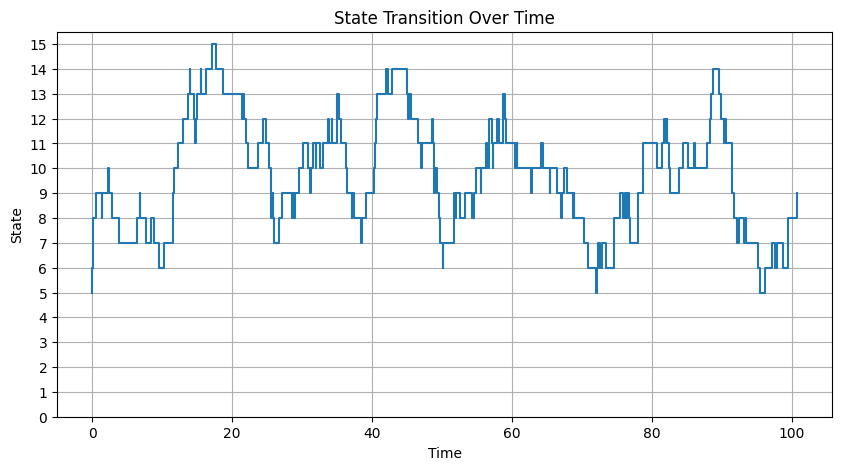

In [3]:

# Example parameters
N = 15
lambd = 0.2
mu = 0.1
initial_state = 5
T = 100

# Run the simulation
result = simulate_birth_death_process(N, lambd, mu, initial_state, T)

# Unpacx results for plotting
times, states = zip(*result)

# Plotting
plt.figure(figsize=(10, 5))
plt.step(times, states, where='post')
plt.title('State Transition Over Time')
plt.xlabel('Time')
plt.ylabel('State')
plt.yticks(range(N+1))
plt.grid(True)
plt.show()


## Infinitesimal Generator $ Q $

The infinitesimal generator $ Q $ for the birth-death process on $ (0, 1, ..., N) $ with birth rates $\lambda_n = (N-n)\lambda$ and death rates $\mu_n = n\mu$ is a $(N+1) \times (N+1)$ matrix defined as follows:

- $ Q_{n, n+1} = \lambda_n = (N-n)\lambda $ for $ n = 0, 1, \ldots, N-1 $
- $ Q_{n, n-1} = \mu_n = n\mu $ for $ n = 1, 2, \ldots, N $
- $ Q_{n, n} = -(\lambda_n + \mu_n) $ for all $  n = 0, 1, \ldots, N $



### Forward kolmogorov Equations

The forward kolmogorov equations for a birth-death process with states ranging from $0$ to $N$ are derived from the generator matrix $Q$.The matrix multiplication $P'(t) = P(t)Q$
### Equations for Transition Probabilities

For any state $n = 0, 1, \ldots, N$, the transition probabilities are governed by:

1. **Transition from state 0:**
   $$
   \frac{d}{dt} P_{n,0}(t) = -\lambda_0 P_{n,0}(t) + \mu_1 P_{n,1}(t)
   $$
   Here, $Q_{0,0} = -\lambda_0$ and $Q_{1,0} = \mu_1$, corresponding to the rates of leaving state 0 and moving from state 1 to 0, respectively.

2. **Transitions for states $1 \leq x \leq N-1$:**
   $$
   \frac{d}{dt} P_{n,x}(t) = \lambda_{x-1} P_{n,x-1}(t) - (\lambda_x + \mu_x) P_{n,x}(t) + \mu_{x+1} P_{n,x+1}(t)
   $$
   This equation incorporates transitions from state $ x-1$ to $x$ $\lambda_{x-1}$, remaining in state $x$ $(\lambda_x + \mu_x)$, and transitions from state $x+1$ to $x$ $\mu_{x+1}$.

3. **Transition from the highest state $N$:**
   $$
   \frac{d}{dt} P_{n,N}(t) = \lambda_{N-1} P_{n,N-1}(t) - \mu_N P_{n,N}(t)
   $$
   In this case, $Q_{N-1,N} = \lambda_{N-1}$ and $Q_{N,N} = -\mu_N$, reflecting the transition rates into and out of the highest state $N$.



We can define the generating function $ G_x(s, t) $ is defined as: ( since we are working on a discrete state space)

$$
G_x(s, t) = E[s^{X_t} | X_0 = x] = \sum_{n=0}^{N} s^n P(X_t = n | X_0 = x) = \sum_{n=0}^{N} s^n P_{x,n}(t)
$$

where:
- $ E[s^{X_t} | X_0 = x] $ is the expected value of $ s^{X_t} $ given that the initial state is $ x $,
- $ P(X_t = n | X_0 = x) $ is the probability that the process is in state $ n $ at time $ t $ given that it started in state $ x $,
- $ P_{x,n}(t) $ is the transition probability from state $ x $ to state $ n $ over time $ t $.

We have that : $G_x(s, 0) = s^{x}$


1. **Time Derivative**:
   The partial derivative of $ G_x(s, t) $ with respect to time $ t $ is given by:
   $$
   \frac{\partial G_x}{\partial t} (s, t) = \sum_{n=0}^N s^n \frac{d}{dt} P_{x,n}(t),
   $$
   where $ P_{x,n}(t) $ denotes the probability of transitioning from state $ x $ to state $ n $ at time $ t $.

2. **Space Derivative**:
   The partial derivative of $ G_x(s, t) $ with respect to the generating function parameter $ s $ is:
   $$
   \frac{\partial G_x}{\partial s} (s, t) = \sum_{n=1}^N n s^{n-1} P_{x,n}(t).
   $$

### Applying to the Differential Equation

Given these expressions, we can derive the following partial differential equation:
$$
\lambda N (s - 1) G_x(s, t) + (\mu + (\lambda - \mu) s - \lambda s^2) \frac{\partial G_x}{\partial s} (s, t) - \frac{\partial G_x}{\partial t} (s, t) = 0
$$
By solving  the partial differential equation we find an expression for $G_x(s, t)$ (We will skip the resolution as it is not our main subject).



## Generating Function for Birth-Death Process

The generating function $ G_x(s, t) $ for the process, starting from any state $ x $, is given by the formula:
$0 \leq x \leq N$

$$
G_x(s, t) = \frac{1}{(\lambda + \mu)^N} \left( \mu + \lambda s + \mu (s - 1) e^{-(\lambda + \mu)t} \right)^x \times \left( \mu + \lambda s - \lambda (s - 1) e^{-(\lambda + \mu)t} \right)^{N-x}
$$




From this expression we have that : 
$$
  \left. \frac{\partial G_x}{\partial s}(s, t) \right|_{s=1} = \sum_{n=1}^\infty n P_{x,n}(t) = E[X_t | X_0 = x]
$$

So by taking the Derivative : 
$$
E[X_t | X_0 = x] = 
x\left( \frac{\lambda + \mu e^{-(\lambda+\mu)t}}{(\lambda + \mu)^N} \right) (\mu + \lambda)^{x-1} (\mu + \lambda)^{N-x} + (N - x) (\lambda + \mu)^{N-x-1} \frac{(\mu + \lambda)^x \left(\lambda - \lambda e^{-(\lambda+\mu)t}\right)}{(\mu + \lambda)^{N}}.
$$

In [6]:
# we will simulate the process 1000 times and plot the average number of individuals in a fixed time t (take the last state of each simulation) 
N = 15
lambd = 0.2
mu = 0.1
initial_state = 5
T = 100
num_simulations = 1000

# Run the simulations
results = [simulate_birth_death_process(N, lambd, mu, initial_state, T) for _ in range(num_simulations)]
# find the values of the state at time T
state_values = [result[-1][1] for result in results] # Take the last state of each simulation at time T
# calculate the average number of individuals at time T
average_state = np.mean(state_values)

# the theoretical expected value of the number of individuals at time T
def theoretical_expected_value(x, N, lambd, mu, t):
    term1 = x * ((lambd + mu * np.exp(-(lambd + mu) * t)) / (lambd + mu)**N) * (mu + lambd)**(x-1) * (mu + lambd)**(N-x)
    term2 = (N - x) * ((lambd + mu)**(N-x-1)) * ((mu + lambd)**x) * ((lambd - lambd * np.exp(-(lambd + mu) * t)) / (mu + lambd)**N)
    return term1 + term2

theoretical_value = theoretical_expected_value(initial_state, N, lambd, mu, T) 

relative_difference = (theoretical_value - average_state) / theoretical_value
print(f"The relative difference between the theoretical and empirical average is: {relative_difference:.2%}")


The relative difference between the theoretical and empirical average is: -0.20%


The result is the one we expected, feels nice.

In [19]:
def LLN_Prob_Model(M,N, lambd, mu, initial_state, T):
    sample = np.zeros(M)
    for i in range(M):
        sample[i] = simulate_birth_death_process(N, lambd, mu, initial_state, T)[-1][1]
    return np.mean(sample), np.std(sample)  

mean,std = LLN_Prob_Model(num_simulations, N, lambd, mu, initial_state, T)
lenght_IC=2*1.96*std/np.sqrt(num_simulations)
theoretical_value = theoretical_expected_value(initial_state, N, lambd, mu, T) 

print(f"The expected value of the state at time T = {T} starting from state {initial_state}")
print(theoretical_value)
print("\n")
print("Monte Carlo Probability,Asymptotic Confidence interval 95%")
print("CI={:1.10f} +/- {:1.6f} \n".format(mean,lenght_IC/2))
print("CI=[{:1.10f}, {:1.6f}] \n".format(mean-1.96*std/np.sqrt(num_simulations),mean+1.96*std/np.sqrt(num_simulations)))
print("Relative error (the precision of the Monte Carlo simulation) = lenght_CI/MonteCarloProba = {:1.10f} % \n".format(100*lenght_IC/mean))

The expected value of the state at time T = 100 starting from state 5
9.99999999999953


Monte Carlo Probability,Asymptotic Confidence interval 95%
CI=10.0450000000 +/- 0.110370 

CI=[9.9346296346, 10.155370] 

Relative error (the precision of the Monte Carlo simulation) = lenght_CI/MonteCarloProba = 2.1975184750 % 

